# <span style="color:red">Seaborn | Part-5: LM Plot & Reg Plot:</span>

Welcome to another lecture on Seaborn! This is going to be the first among a series of plots that we shall be drawing with Seaborn. In this lecture, we shall be covering the concept of plotting **Linear Regression** data analysis, which is a very common method in *Business Intelligence*, and *Data Science* domain in particular. To begin with, we shall at first try to gain *statistical overview* of the concept of *Linear Regression*.

As our intention isn't to dive deeply into each statistical concept, I shall instead pick a curated dataset and show you different ways in which we can visualize whatever we deduced during our analysis. Using Seaborn, there are two important types of figure that we can plot to fulfil our project needs. One is known as **<span style="color:red">'LM Plot'</span>** and the other one is **<span style="color:red">'Reg Plot'</span>**. Visualy, they have pretty much similar appearance, but do have functional difference that I will highlight in detail for you to understand.

**<span style="color:red">Linear Regression</span>** is a *statistical concept for predictive analytics*, where the core agenda is to majorly examine three aspects:

- Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?
- Which variables in particular are significant predictors for the outcome variable?
- In what way do they (indicated by the magnitude and sign of the beta estimates) impact the outcome variable? These **Beta Estimates** are just the *standardized coefficients* resulting from a *regression analysis*, that have been standardized so that the variances of dependent and independent variables are 1.

Let us begin by importing the libraries that we might need in our journey and this is something you will find me doing at the start of every lecture so that we don't have to bother about dependancies throughout the lecture.

In [2]:
# Importing intrinsic libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", palette="hsv")
import warnings
warnings.filterwarnings("ignore")

Let us now generate some data to play around with using **Numpy** for two imaginary classes of points. Please note that throughout the course I wouldn't be explaining Data generation as that is a component of Data Analysis. With that been said, let us try to plot something here:

In [3]:
# Loading Built-in Dataset:
tips = sns.load_dataset("tips")

# Fetching preview of Dataset:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


## Seaborn Lmplots:

Every plot in Seaborn has a set of fixed parameters. For `sns.lmplot()`, we have three manadatory parameters and the rest are optional that we may use as per our requirements. These 3 parameters are values for X-axis, values for Y-axis and reference to dataset. These 3 are pre-dominantly visible in almost all of Seaborn plots and in addition, there is an optional parameter which I want you to memorize as it comes in very handy. This is **hue** parameter and it takes in categorical columns and kind of helps us to group our data plot as per *hue* parameter values.

Let me show you how it works:

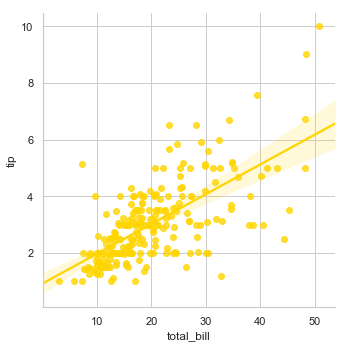

In [4]:
# Basic lmplot visualization:
sns.lmplot(x="total_bill", y="tip", data=tips)

Let us now understand what we see on the screen before we jump into adding parameters. This linear line across our plot is the best available fit for the trend of the tip usually customers give with respect to the total bill that gets generated. And the data points that we see at extreme top right which are far away from this line are known as **outliers** in the dataset. You may think of *outliers* as exceptions.

Goal of Data Science is to predict the best fit for understanding the trend in behavior of visiting customers and our algorithm shall be always designed accordingly. You may find this a common scenario while applying Logistic Regression algorithms in Machine Learning. If you very cllosely notice there is this shadow converging at the centre where there is a chunk of our data. This covergent point is actually the statistical mean or in simpler words, the generalized prediction of tip value in this restaurant on a daily basis.

In this case, looking at this plot, we may say that if the total bill is around $20.00, then it shall get a tip of around $3.00. Let us refine this visualization even further by adding more features to the plot, and for this purpose let us try to understand if a Smoker in general *tip* more or *less*:

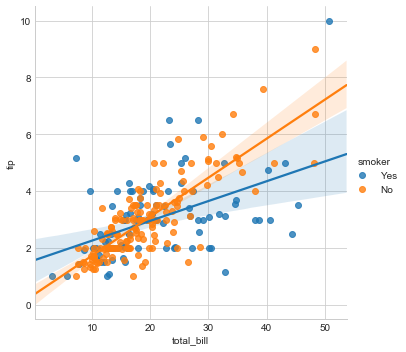

In [7]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

Somehow it refects that Smokers that you may see in blue are little more generous but not so consistent with their tipping mechanism as the data points are quite vaguely spread out. So, addition of the 3rd parameter of **hue** helped us visualize this difference in separate color plotting, and has also added a **legend** with *Yes*, *No* to conveniently interpret.

Let us look into other commonly used parameters to customize this plot further:

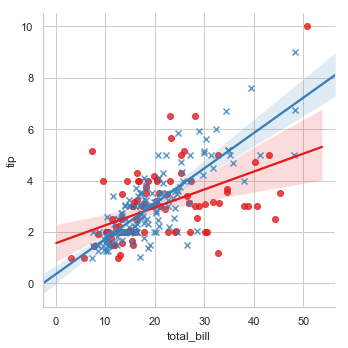

In [5]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"], palette="Set1", legend=False)

Here, we set data point marker style, altered the coloring and decided to remove the legend which by default is always there. Right now, be it for a smoker or for a non-smoker, the representation is on the same plot so let us get it on separate facets:

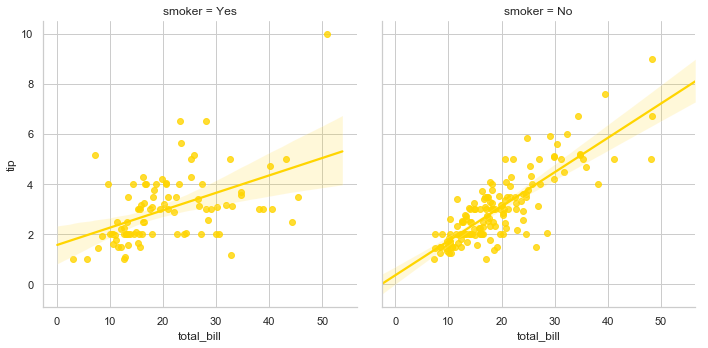

In [6]:
sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips)

There is a lot that you may experiment with by using different optional parameters, but in a shell, basic presentation with mandatory arguments remain the same. Let me show you one more on Tips dataset:

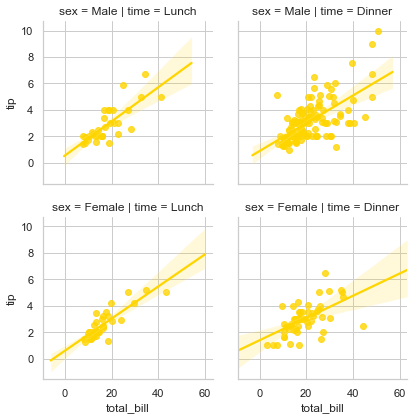

In [7]:
sns.lmplot(x="total_bill", y="tip", palette="magma", row="sex", col="time", data=tips, size=3)

This plot in 4 separate facets drill deeper into visualizing the data, where we still show the tip being given against total bill but is now also segmented into whether it was Lunch time or not along with dependency on Gender. There shall be multiple occassions where you would like to visualize such a deeper segmentation. Currently we have a small dataset so we still have our hands tied but with real-world dataset exploration, this visualization gets limitless.

Now, I shall show you a generic usage of lmplot() where we shall generate random data points and then fit a regression line across it. I am showing this implementation just to give an overview of how it generally looks like in production environment and if you're a beginner and not so proficient with Python programming, don't really need to get stressed because with time, you shall gain command over it.

Please note that our focus is just on visualization, so we won't really get into **NumPy** module usage. Let's get started:

In [10]:
# Generating Random Data points:
def generatingData():
    num_points =1500
    category_points =[]
    
    for i in range(num_points):
        if np.random.random()>0.5:
            x,y = np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)
            category_points.append([x,y])
        else:
            x, y = np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)
            category_points.append([x, y])
            
    df = pd.DataFrame({'x':[v[0] for v in category_points], 'y':
                      [v[1] for v in category_points]})
    
    sns.lmplot('x', 'y', data=df, fit_reg=True, size=6)
    plt.show()

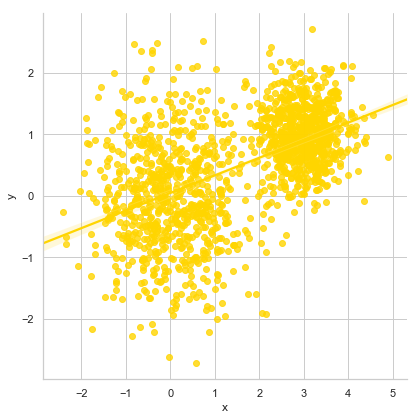

In [11]:
generatingData()

Here we see jumbled up data points on the plot with a linearly fitted line passing through, thus reflecting best fit for existing trend as per dataset. In general, I would always recommend to keep the sequence of parameters intact as per [sns.lmplot()](https://seaborn.pydata.org/generated/seaborn.lmplot.html) official documentation which looks pretty much like this:

`seaborn.lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, size=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None)`

Here the values that we see against few optional parameters are there by default, unless we specifically alter it in our code. Also, we need to always make sure that `x` and `y` feature values should always be **strings** to maintain tidy data format. If you feel curious to know in depth about **tidy data**, I would suggest reading a research paper by Hadley Wickham that titles [Journal of Statistical Software](http://vita.had.co.nz/papers/tidy-data.pdf). I have attached the link to access it's PDF format in the notebook.

## Seaborn Regplots:

In terms of core functionality, `reglot()` is pretty similar to `lmplot()` and solves similar purpose of visualizing a linear relationship as determined through Regression. In the simplest invocation, both functions draw a scatterplot of two variables, `x` and `y`, and then fit the regression model `y ~ x`; and plot the resulting regression line and a *95% confidence interval* for that regression. In fact, `regplot()` possesses a subset of `lmplot()'s` features.

Important to note is the difference between these two functions in order to choose the correct plot for your usage.
- Very evident difference is the shape of plot that we shall observe shortly.
- Secondly, [regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html) has mandatory input parameter flexibility. This means that `x` and `y` variables DO NOT necessarily require *strings* as *input*. Unlike `lmplot()`, these two parameters shall also accept other formats like simple *NumPy arrays*, *Pandas Series* objects, or as references to variables in a *Pandas DataFrame* object passed to input data.

The parameters for `regplot()` as per it's official documentation with all it's parameters look like this:

`seaborn.regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)`

There isn't much of a visual difference so let's quickly plot a `regplot()` to understand it better. But before I do that, I would like you to make a note of the fact that `Seaborn regplot()` or `lmplot()` **does not support regression against date data** so if you're dealing with *Time-series algorithms*, please make a careful choice. Also note that `lmplot()` that we just finished discussing is just a wrapper around `regplot()` and `facetgrid()`, that we shall be taking up later in this course.

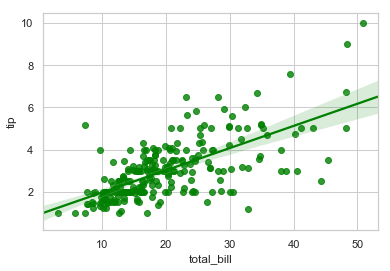

In [12]:
sns.regplot(x="total_bill", y="tip", data=tips, color="g")

For a change, let us also try to plot with *NumPy arrays*:

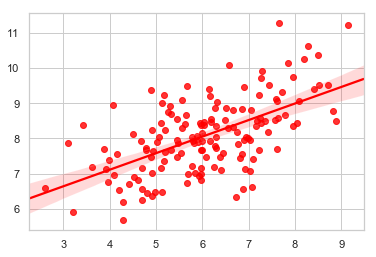

In [13]:
import numpy as np
np.random.seed(8)  # Initializing RandomState
mean, cov = [6, 8], [(1.5, .7), (.7, 1)]  # Mean and Covariance
x, y = np.random.multivariate_normal(mean, cov, 150).T  # Generalizing 1-Dimensional Gaussian distribution to higher dimensions.
sns.regplot(x=x, y=y, color="r")

With the declaration itself, we know what we have plotted and aesthetically it is something we have already discussed in detail and that brings us to the end of this lecture where we have in length gone through two important aspects of Regression plotting. Third one, i.e. facetgrid is parked in the list and we shall take that as well very soon.

The datasets we have dealt with till now have data points pretty neatly arranged and hence presenting a logistic fit isn't that cumbersome but let us now look at few complex scenarios. The very first one we are going to deal with is to fit a nonparametric regression using a [lowess smoother](https://en.wikipedia.org/wiki/Local_regression).

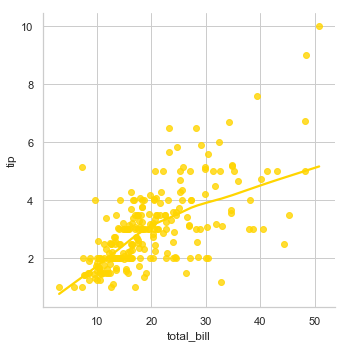

In [16]:
sns.lmplot(x="total_bill", y="tip", data=tips, lowess=True)

This is a *computationally intensive* process as it is robust and hence in the backend it doesn't take `ci` parameter, i.e. *confidence interval* into consideration. Here the line bends around to get more precise estimate as per the spread of data points, as visible. Let us get another built-in dataset available with Seaborn to have a better view of applied Logistic Regression scenarios:

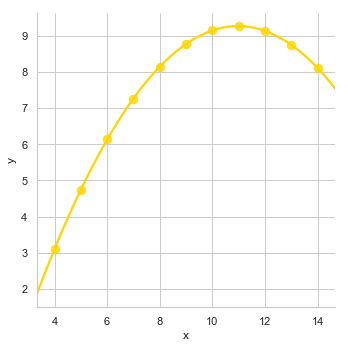

In [21]:
# Loading another Built-in dataset:
anscombe = sns.load_dataset("anscombe")

sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2, ci=None, scatter_kws={"s": 70})

This majorly helps to tackle *Outliers* in our dataset to fit a **polynomial regression model** to explore simple kinds of nonlinear trends because the linear relationship is the same but our simple plot wouldn't have been able to trace it. Let me show how it would have looked:

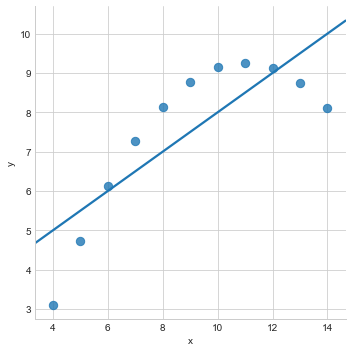

In [59]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), ci=None, scatter_kws={"s": 70})

With all that understanding, the only thing I feel I should get you acquainted with are the commonly used optional parameters:
- Parameters like `x_jitter` and `y_jitter` are used to add noise to our dataset.
- `color` parameter helps you get Matplotlib style color.
- `dropna` helps to drop NaN (NULL) values.
- `x_estimator` param is useful with discrete variables.
- `ci` represents the size of Confidence interval used when plotting a [central tendency](https://en.wikipedia.org/wiki/Central_tendency) for discrete values of x.
- `label` is used to assign a suitable name to either our *Scatterplot* (in *legends*) or *Regression line*.

Thank You for your patience throughout this visually exhaustive lecture and hope to see you in the next one. If you have any questions or something that you need more explanation on, please do let me know and till then, Happy Visualizing!